## Geodata를 활용한 그룹핑 분석



DB : PostgreSQL v16.3

### DB 접속, CSV 파일 정보를 DB에 업력

In [ ]:
import pandas as pd
import psycopg2
from psycopg2 import sql

#CSV 파일 경로
csvFilePath = 'csv/schoolGpsdata240322.csv'

#DB 연결
db = psycopg2.connect(host='localhost', dbname='geodata', user='postgres', password='3844', port=5432)
db.set_client_encoding('UTF-8')
cur = db.cursor()
tableName = 'schools'

#CSV 처리
df = pd.read_csv(csvFilePath, encoding='CP949')

# 데이터프레임의 열 이름을 가져오기
columns = df.columns.tolist()

# 데이터 삽입을 위한 SQL 쿼리 생성
insert_query = sql.SQL('''INSERT INTO {table} ({fields}) VALUES ({values})''').format(
    table=sql.Identifier(tableName),
    fields=sql.SQL(', ').join(map(sql.Identifier, columns)),
    values=sql.SQL(', ').join(sql.Placeholder() * len(columns))
)

# 데이터프레임의 각 행을 데이터베이스에 삽입
for _, row in df.iterrows():
    cur.execute(insert_query, row.tolist())

# 변경 사항 커밋
db.commit()

# 연결 종료
cur.close()
db.close()
print("Data inserted successfully.")


<Axes: xlabel='longi', ylabel='lati'>

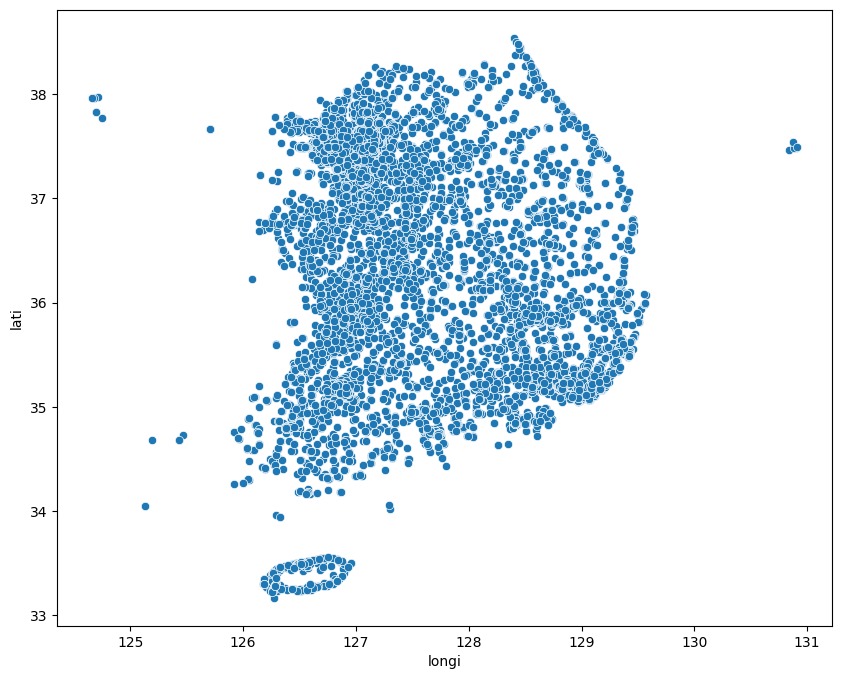

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2
import seaborn as sns
import numpy as np

#CSV 파일 경로
csvFilePath = 'csv/schoolGpsdata240322.csv'

#DB 연결
db = psycopg2.connect(host='localhost', dbname='geodata', user='postgres', password='3844', port=5432)
db.set_client_encoding('UTF-8')
cur = db.cursor()
tableName = 'schools'

#CSV 처리
df = pd.read_csv(csvFilePath, encoding='CP949')
df2 = df.astype({'longi':float, 'lati':float})

#그래프 그리기
plt.figure(figsize=(10,8))
sns.scatterplot(data = df2, x="longi", y="lati")


